In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from pylab import *

In [2]:
df = pd.read_csv('steam.csv')
df.columns

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price'],
      dtype='object')

In [3]:
feature = [i for i in df.columns if i not in ['appid', 'name']]
# pd.set_option('display.max_columns', None)
print(feature)

['release_date', 'english', 'developer', 'publisher', 'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags', 'achievements', 'positive_ratings', 'negative_ratings', 'average_playtime', 'median_playtime', 'owners', 'price']


In [20]:
df['owners'].unique()

array(['10000000-20000000', '5000000-10000000', '2000000-5000000',
       '20000000-50000000', '100000000-200000000', '50000000-100000000',
       '20000-50000', '500000-1000000', '100000-200000', '50000-100000',
       '1000000-2000000', '200000-500000', '0-20000'], dtype=object)

In [4]:
num_feature = ['achievements', 'positive_ratings', 'negative_ratings', 'average_playtime', 'median_playtime', 'price']
cat_feature = ['release_date', 'english', 'developer', 'publisher', 'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags']
cols = ['0-20000', '20000-50000', '50000-100000', '100000-200000', '200000-500000', '500000-1000000', '1000000-2000000', '2000000-5000000', 
        '5000000-10000000', '10000000-20000000', '20000000-50000000', '50000000-100000000', '100000000-200000000']
recols = pd.Series(['0-20k', '20k-50k', '50k-100k', '100k-200k', '200k-500k', '500k-1m', '1m-2m', '2m-5m', '5m-10m', '10m-20m', '20m-50m', 
                    '50m-100m', '100m-200m'])

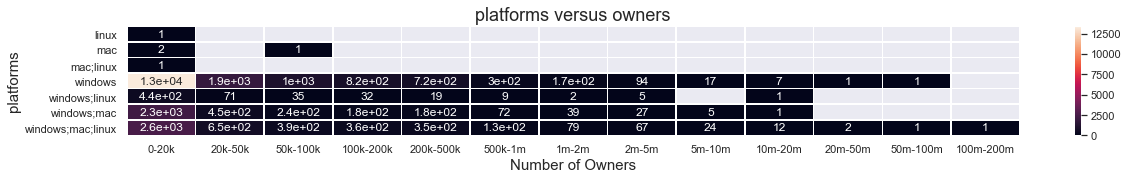

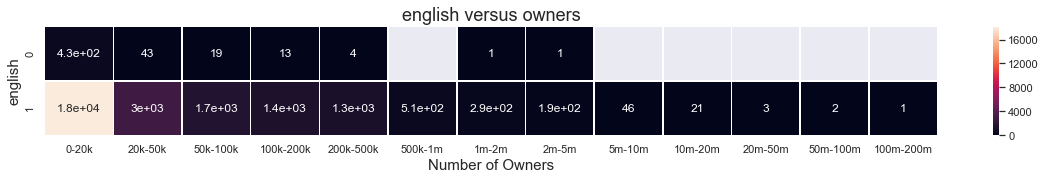

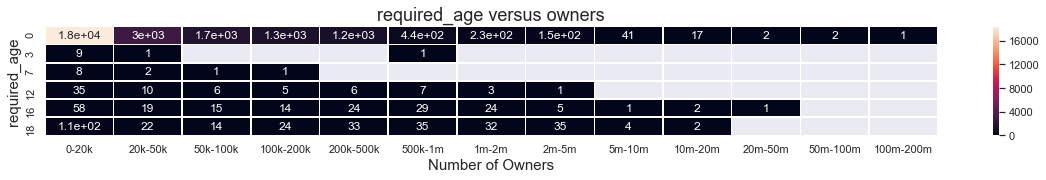

In [34]:
for feature in ['platforms', 'english', 'required_age']:
    group = df.groupby([feature, 'owners'])['name']
    group = group.count().to_frame()
    fea_owners = group.reset_index()
    fea_owners = fea_owners.pivot(index=feature,columns='owners',values='name')
    fea_owners = fea_owners[cols]
    figure(figsize = (20,2))
    fea_owners.columns = recols
    sns.set()
    ax = sns.heatmap(fea_owners, annot=True, linewidths=.5)
    ax.set_title(feature + ' versus owners', fontsize = 18)
    ax.set_xlabel('Number of Owners', fontsize = 15)
    ax.set_ylabel(feature, fontsize = 15, rotation = 'vertical')
    plt.savefig(feature + ' versus owners.png')
    plt.show()

In [5]:
df.eval('total_ratings = positive_ratings + negative_ratings', inplace = True)

In [6]:
df.eval('positive_ratio = positive_ratings / total_ratings', inplace  = True)

In [7]:
temp = list(df['owners'])
y = [cols.index(i) for i in temp]

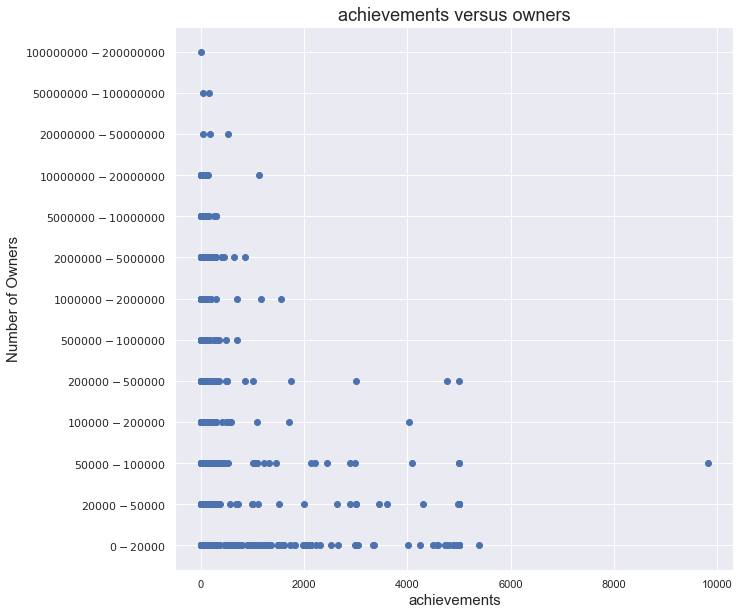

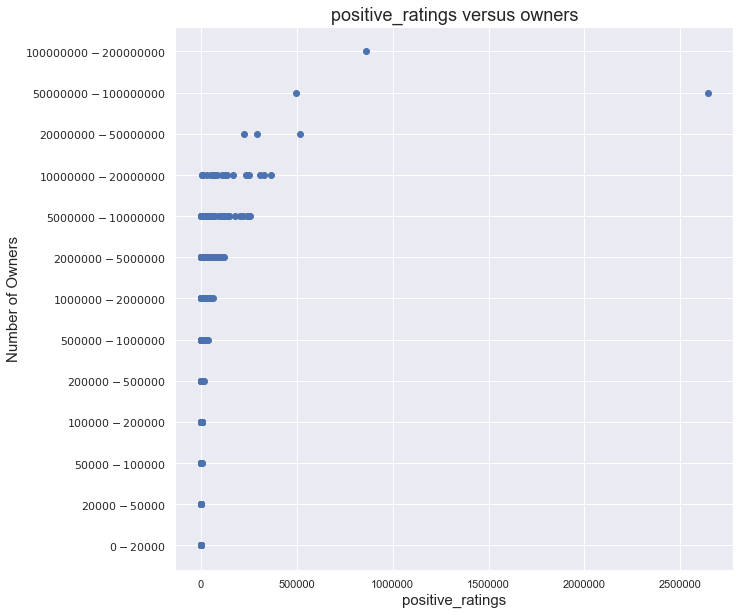

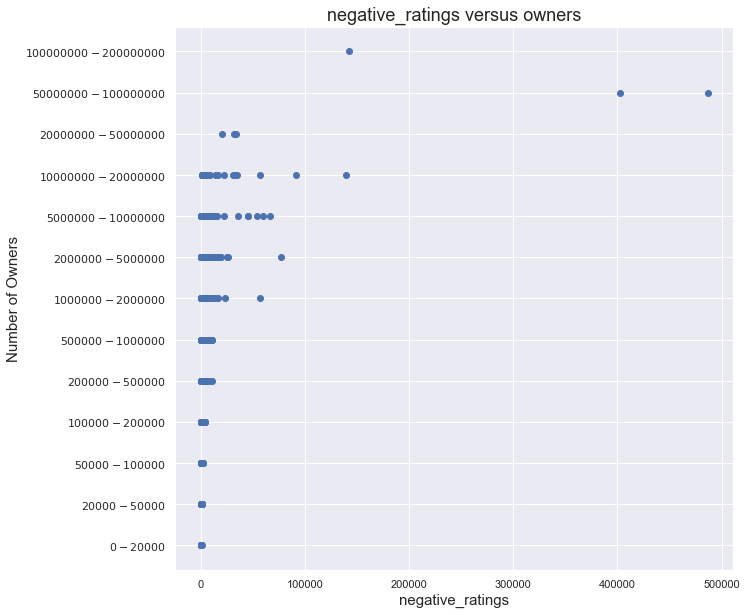

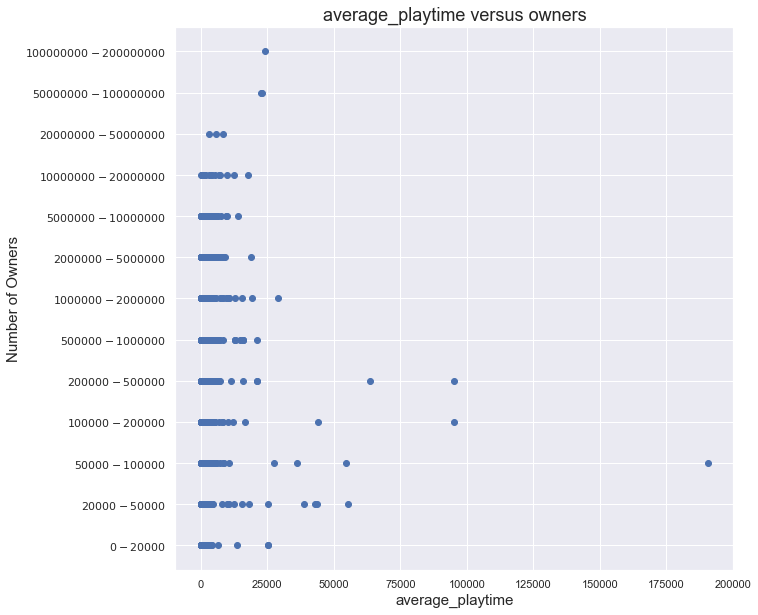

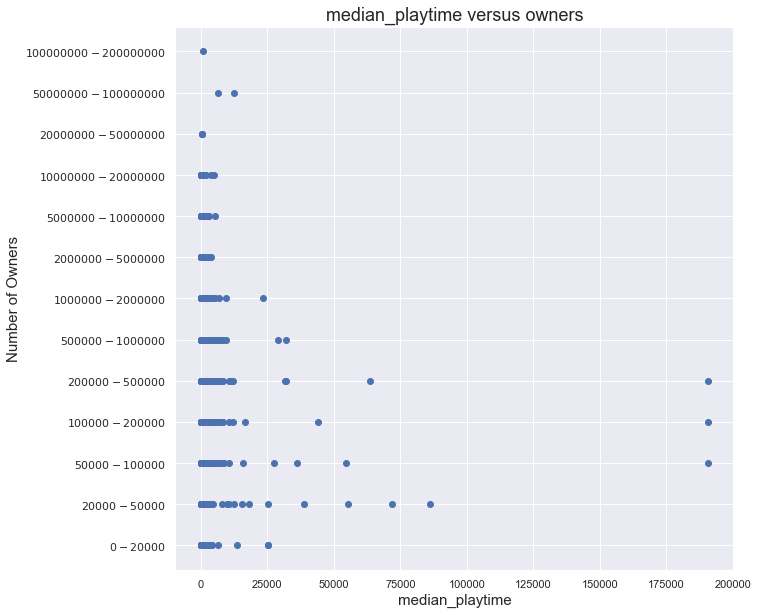

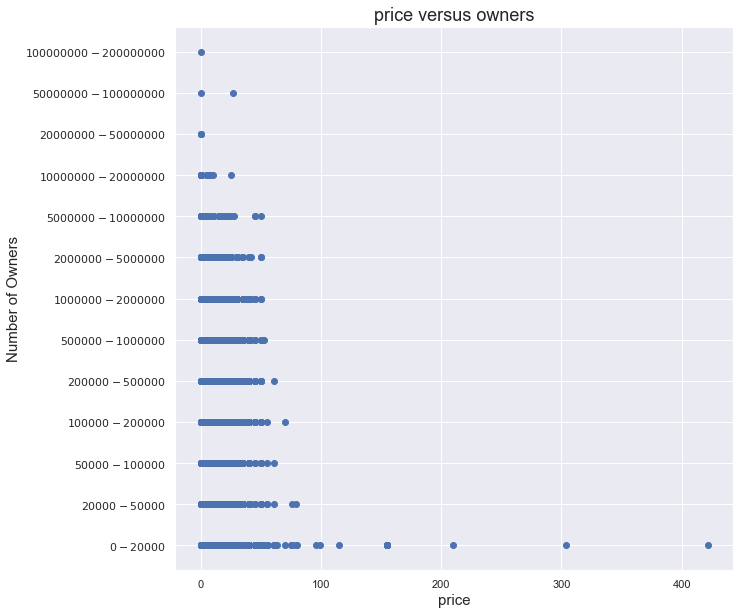

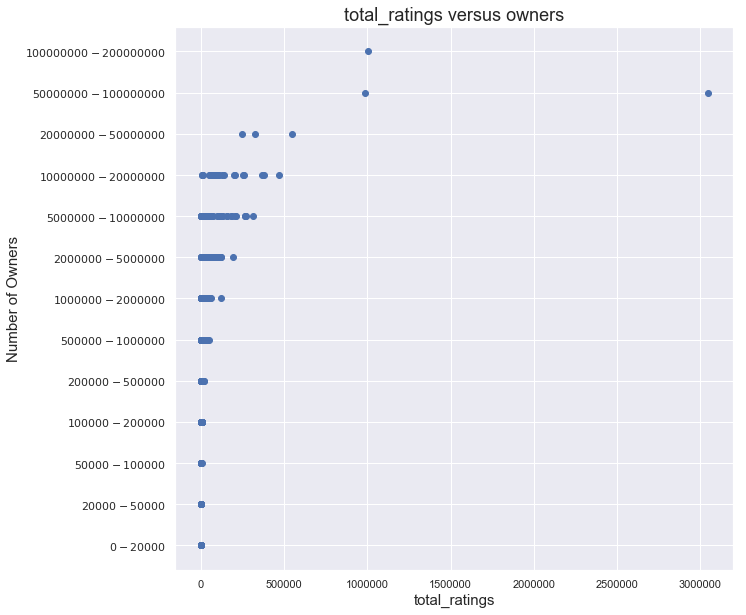

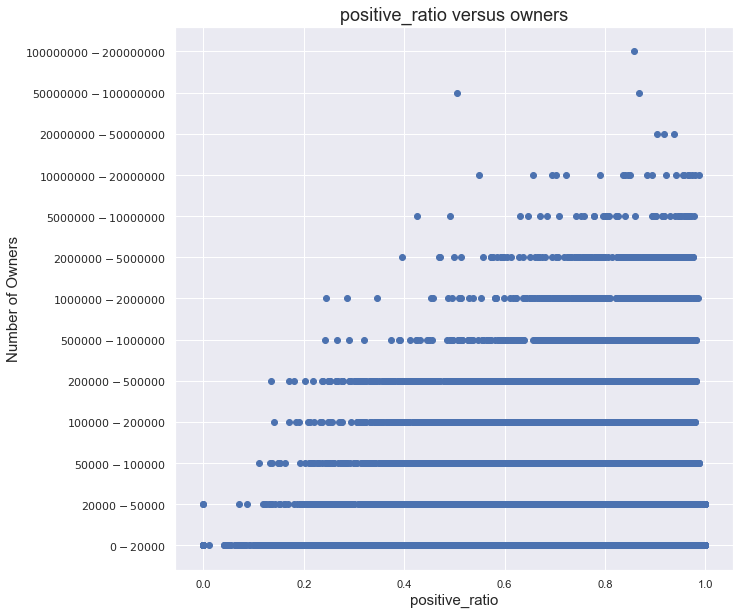

In [73]:
for feature in ['achievements', 'positive_ratings', 'negative_ratings', 'average_playtime', 'median_playtime', 'price', 
                'total_ratings', 'positive_ratio']:
    x = list(df[feature])
    figure(figsize = (10, 10))
    plt.scatter(x, y)
    plt.title(feature + ' versus owners', fontsize = 18)
    plt.xlabel(feature, fontsize = 15)
    plt.ylabel('Number of Owners', fontsize = 15)
    plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
               [r'$0-20000$', r'$20000-50000$', r'$50000-100000$', r'$100000-200000$', r'$200000-500000$', r'$500000-1000000$', 
                r'$1000000-2000000$', r'$2000000-5000000$', r'$5000000-10000000$', r'$10000000-20000000$', r'$20000000-50000000$', 
                r'$50000000-100000000$', r'$100000000-200000000$'])
    plt.grid(True)
    plt.savefig(feature + ' versus owners.png')
    plt.show()

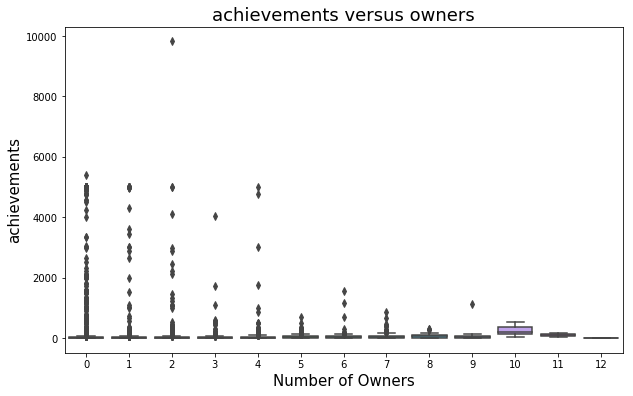

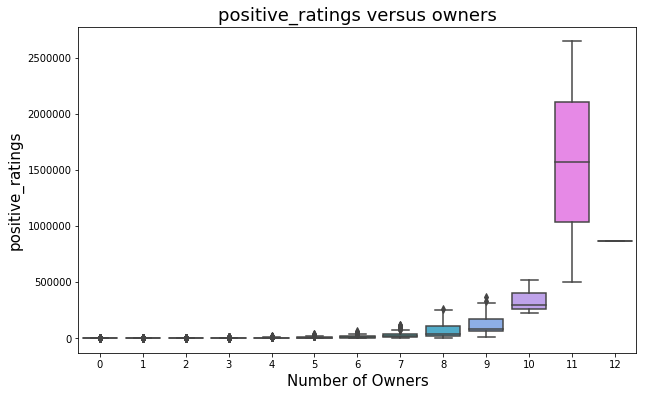

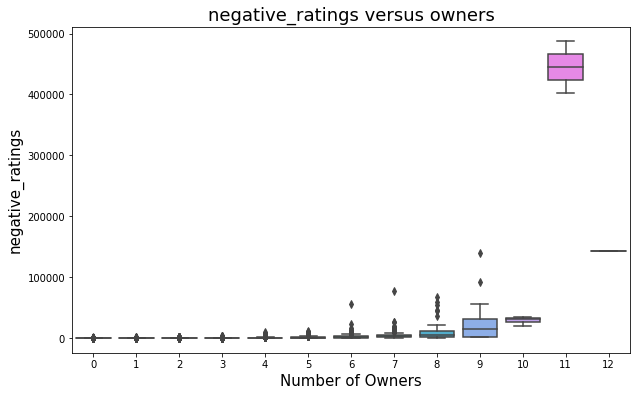

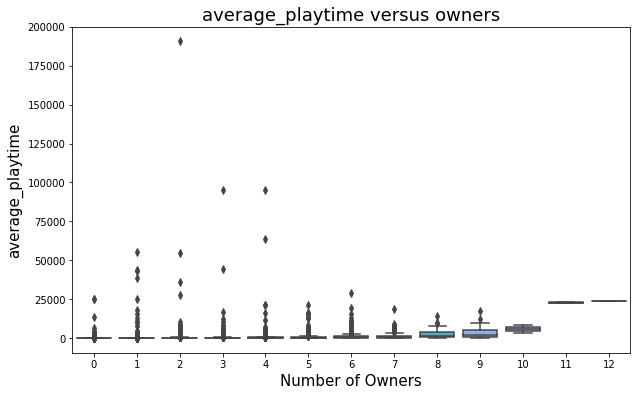

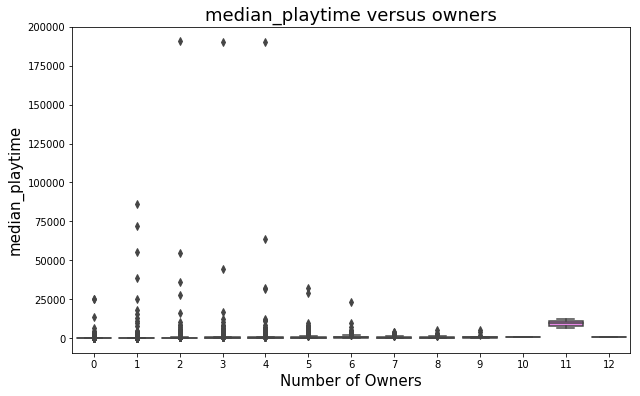

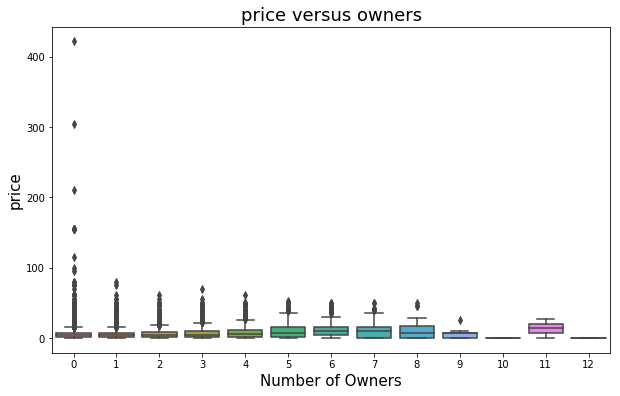

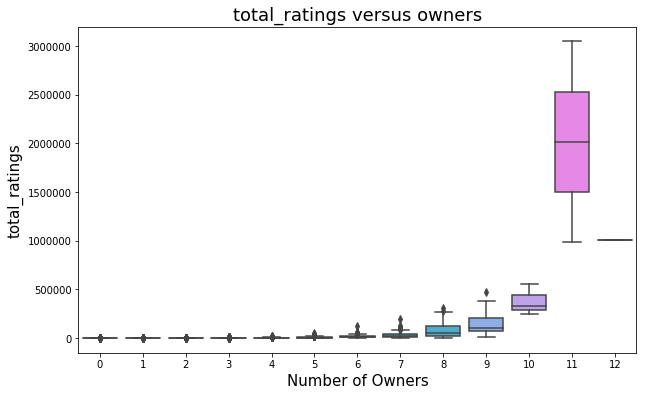

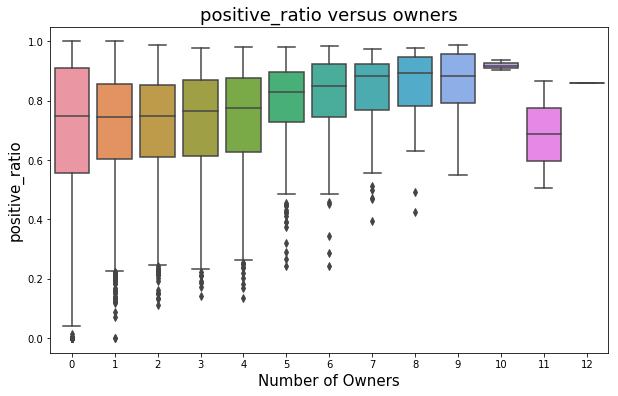

In [8]:
for feature in ['achievements', 'positive_ratings', 'negative_ratings', 'average_playtime', 'median_playtime', 'price', 
                'total_ratings', 'positive_ratio']:
    x = list(df[feature])
    f1, ax = plt.subplots(figsize=(10, 6))
    fig = sns.boxplot(x=y, y=x)
    plt.title(feature + ' versus owners', fontsize = 18)
    plt.ylabel(feature, fontsize = 15)
    plt.xlabel('Number of Owners', fontsize = 15)
    plt.show()